### Task 3: SHAP Explainability for Fraud Detection
Models: Logistic Regression, XGBoost
Generates:
- SHAP summary plots for global feature importance
- SHAP waterfall plots for local instance explanations
- Due to kernel crashes random forest is not included

#### Load Libraries

In [1]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
# Load test data, scaler, and feature names
X_test = joblib.load("../outputs/X_test.pkl")  # numpy array
scaler = joblib.load("../outputs/scaler.pkl")
feature_names = joblib.load("../outputs/feature_names.pkl")

# Scale and wrap X_test into DataFrame with real feature names
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

#### Shap explainablity 

In [17]:
# Function to run SHAP explainability
def explain_with_shap(model_path, model_name):
    print(f"\n Explaining model: {model_name}")

    # Load model
    model = joblib.load(model_path)

    # SHAP explainer
    explainer = shap.Explainer(model, X_test_scaled_df)
    shap_values = explainer(X_test_scaled_df)

    # SHAP Summary (Global Importance)
    shap.plots.beeswarm(shap_values, max_display=20, show=False)
    plt.title(f"{model_name} - SHAP Global Importance")
    plt.savefig(f"../outputs/shap/{model_name}_shap_beeswarm.png")
    plt.close()

    # Save Global Importance as CSV
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    global_importance = pd.DataFrame({
        'feature': X_test_scaled_df.columns,
        'mean_abs_shap': mean_abs_shap
    }).sort_values(by='mean_abs_shap', ascending=False)
    global_importance.to_csv(f"../outputs/shap/{model_name}_shap_global_importance.csv", index=False)

    # SHAP Waterfall (Local Explanation for first sample)
    shap.plots.waterfall(shap_values[0], show=False)
    plt.title(f"{model_name} - SHAP Local Explanation (Sample 0)")
    plt.savefig(f"../outputs/shap/{model_name}_shap_local_sample0.png")
    plt.close()

    # Save Local Explanation for sample 0
    local_explanation = pd.DataFrame({
        'feature': X_test_scaled_df.columns,
        'shap_value': shap_values[0].values,
        'feature_value': X_test_scaled_df.iloc[0].values
    }).sort_values(by='shap_value', key=abs, ascending=False)
    local_explanation.to_csv(f"../outputs/shap/{model_name}_shap_local_sample0.csv", index=False)

    print(f"SHAP outputs saved for {model_name} to ../outputs/shap/")

 Explaining model: logistic_regression


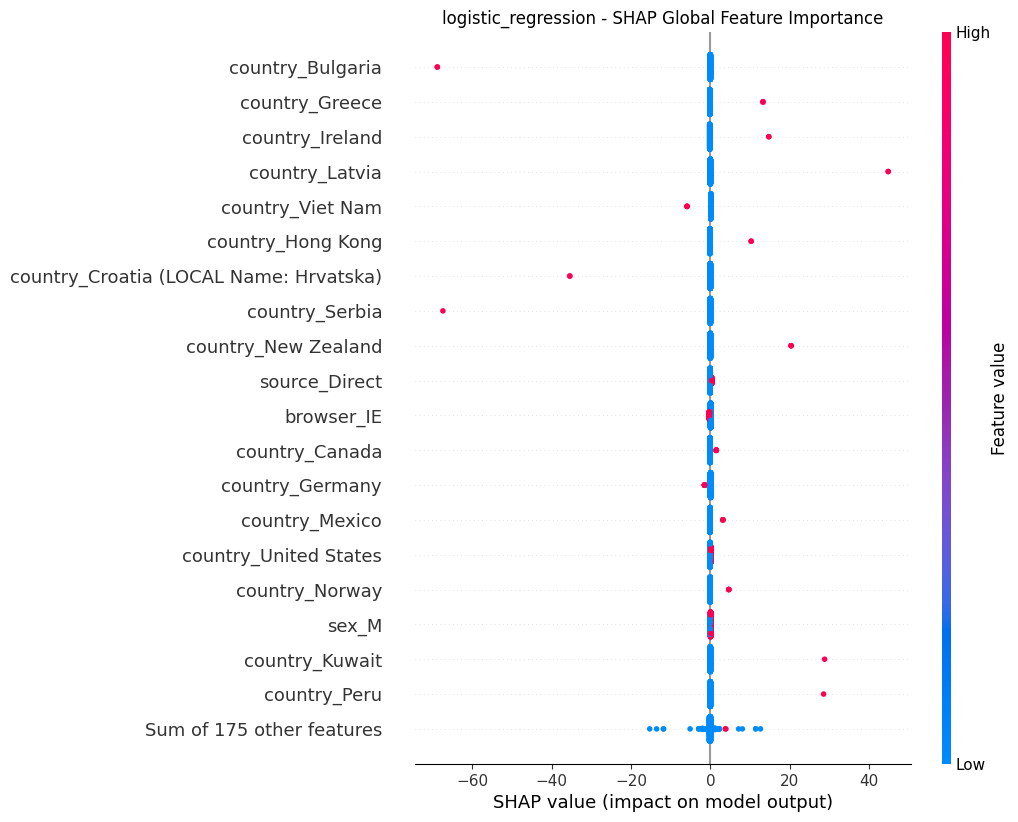

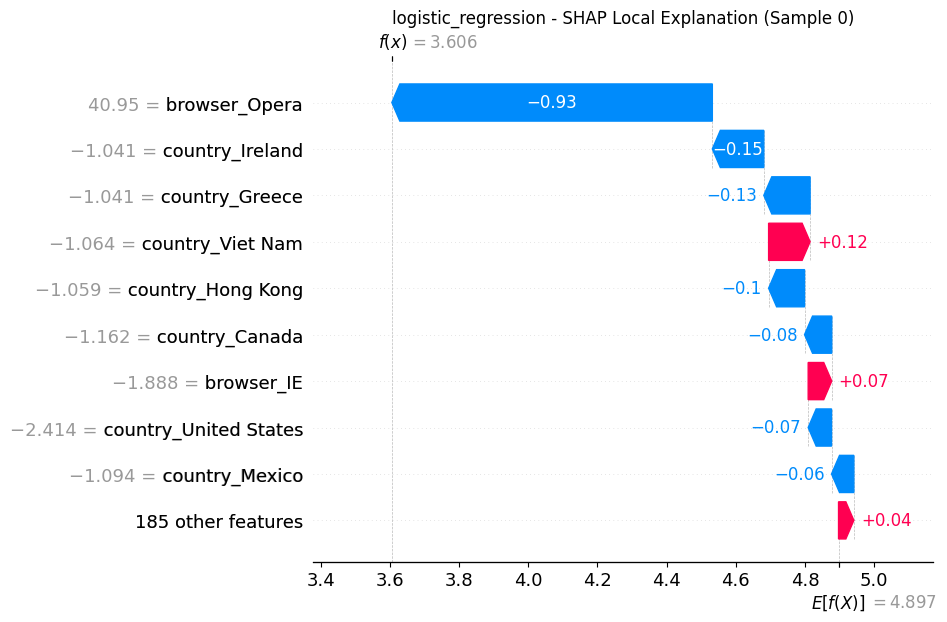

 Explaining model: xgboost


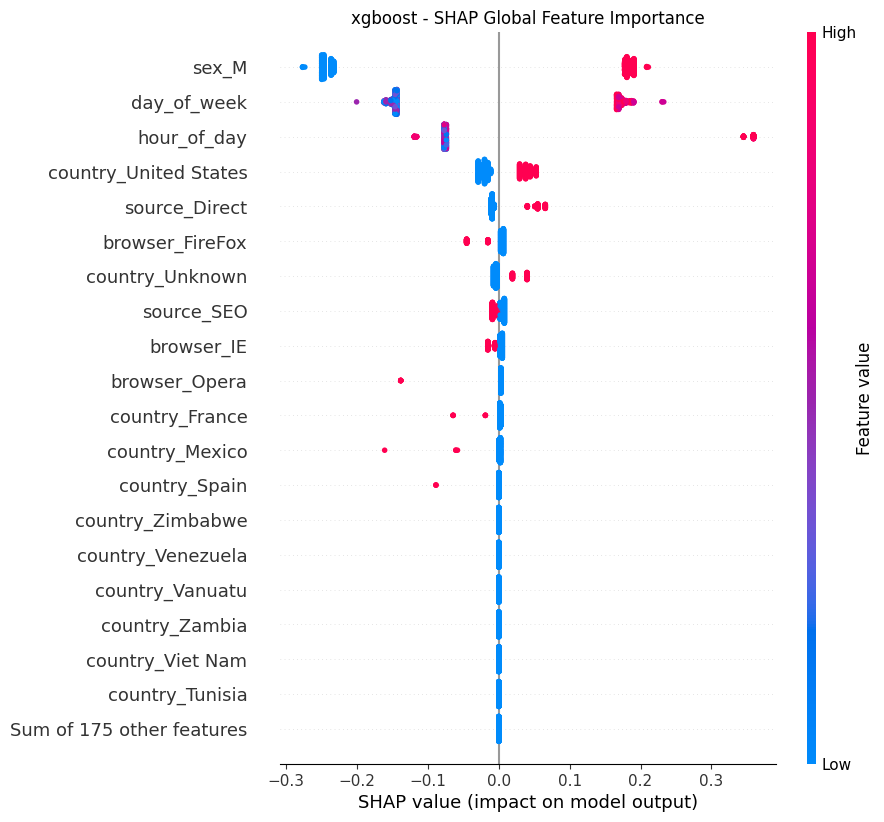

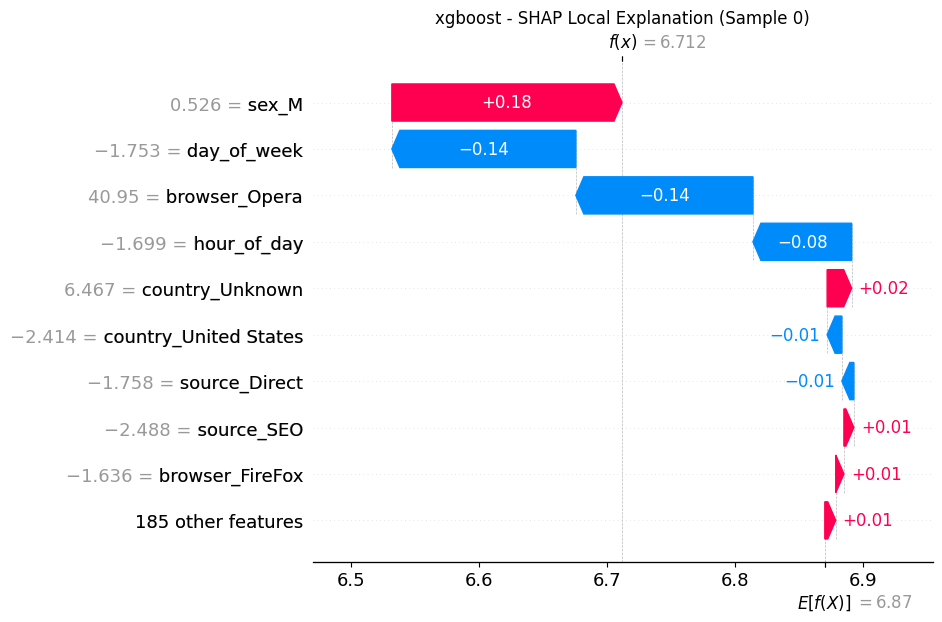

(.values =
 array([[ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07407258, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ]], shape=(500, 194))
 
 .base_values =
 array([6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208,

In [20]:
# Run SHAP for both models
explain_with_shap("../outputs/models/logistic_regression.pkl", "logistic_regression")
explain_with_shap("../outputs/models/xgboost.pkl", "xgboost")
# explain_with_shap("../outputs/models/random_forest.pkl", "random_forest", sample_size=50)

 Explaining model: logistic_regression


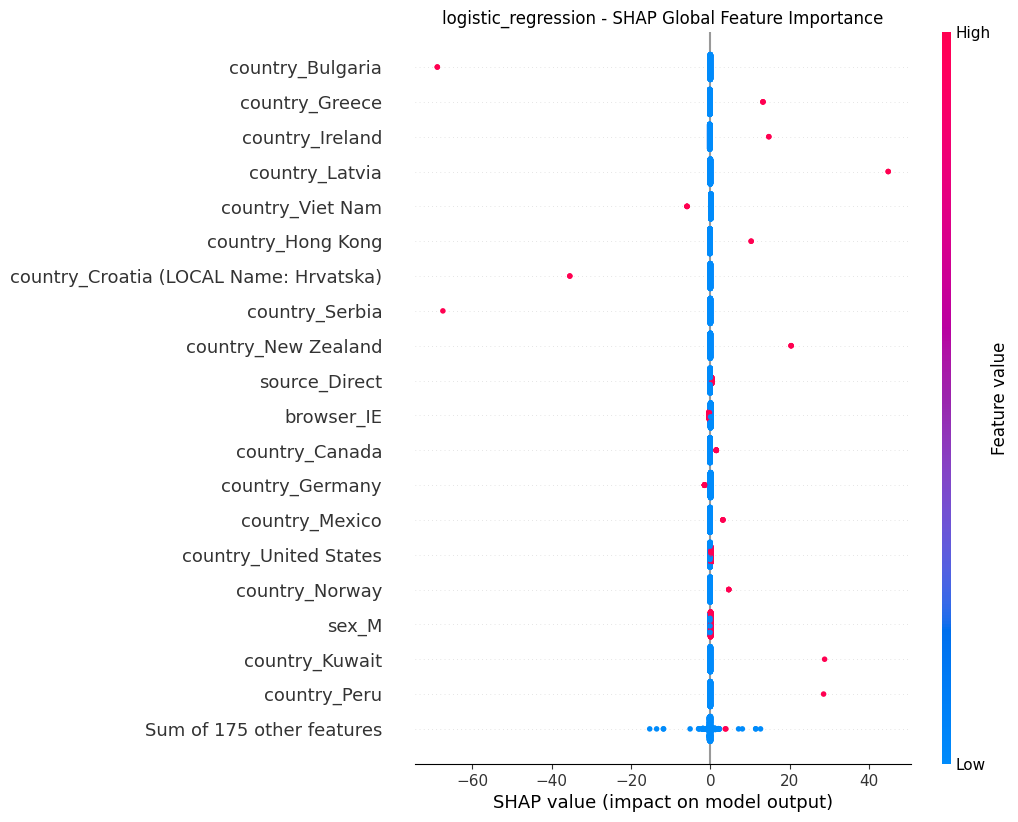

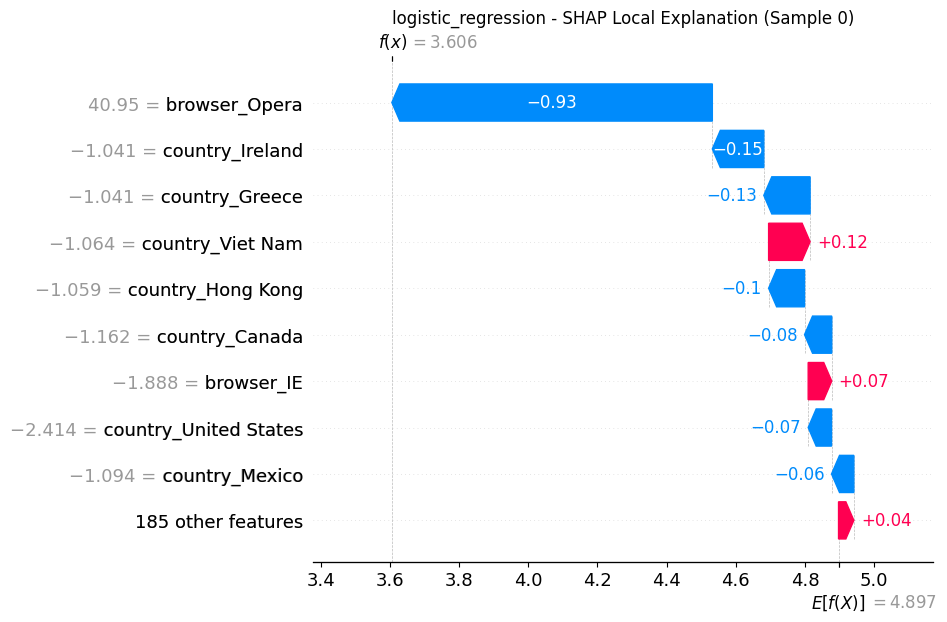

 Explaining model: xgboost


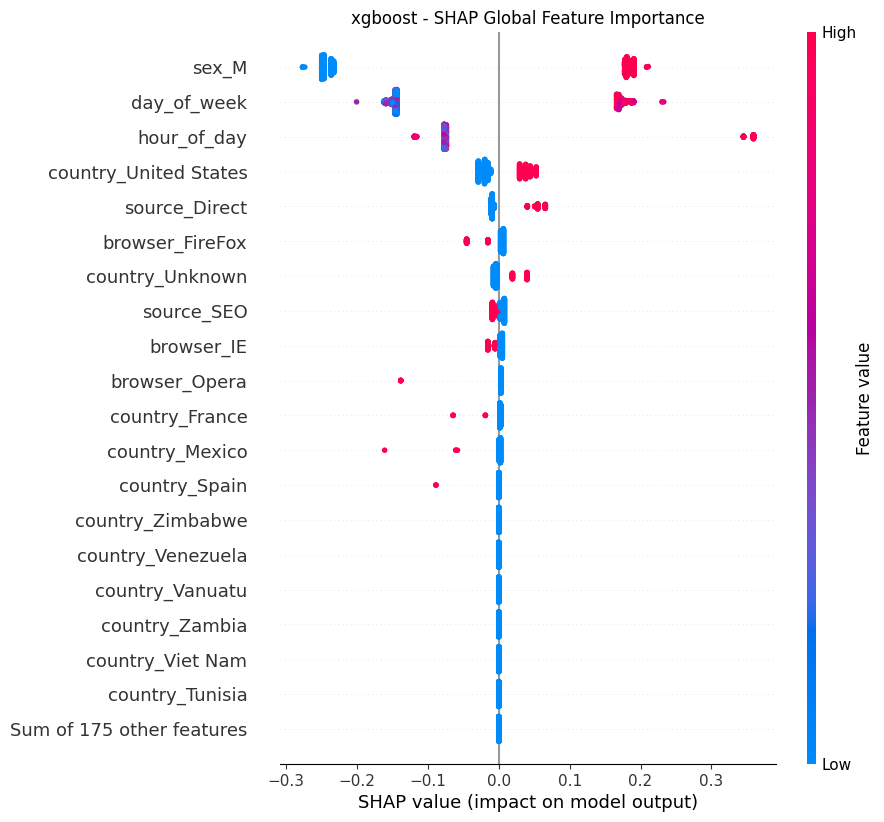

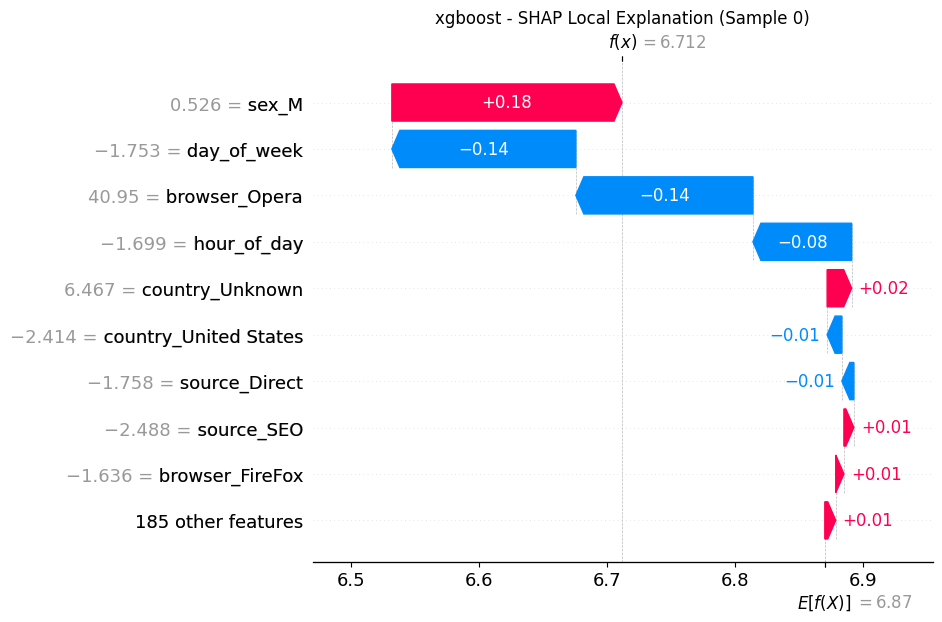

(.values =
 array([[ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07407258, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.07715459, ...,  0.        ,
          0.        ,  0.        ]], shape=(500, 194))
 
 .base_values =
 array([6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208, 6.87024208,
        6.87024208, 6.87024208, 6.87024208, 6.87024208,

In [9]:
# Explain each model
explain_with_shap("../outputs/models/logistic_regression.pkl", "logistic_regression")
explain_with_shap("../outputs/models/xgboost.pkl", "xgboost")
# explain_with_shap("../outputs/models/random_forest.pkl", "random_forest", sample_size=50)